In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper', font_scale=1.3)
red, blue, green = sns.color_palette('Set1', 3)

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [2]:
import curveball

In [3]:
import scipy.io as sio
mat = sio.loadmat('../data/growth/YPD_39deg_RefinedB_vs_TrisomicB.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Feb 07 12:03:15 2012',
 '__version__': '1.0',
 '__globals__': [],
 'plate_mat': array([[0.0608, 0.0598, 0.0631, ..., 0.7016, 0.6972, 0.6914],
        [0.0601, 0.062 , 0.0619, ..., 0.6226, 0.6241, 0.6135],
        [0.0576, 0.059 , 0.0602, ..., 0.7221, 0.7272, 0.7232],
        ...,
        [0.0563, 0.0574, 0.0587, ..., 0.7559, 0.7713, 0.775 ],
        [0.0618, 0.0603, 0.0635, ..., 0.6577, 0.6606, 0.6615],
        [0.0644, 0.06  , 0.0642, ..., 0.7486, 0.7565, 0.7651]]),
 'tps': array([[    0,  1800,  3599,  5401,  7199,  9001, 10799, 12601, 14400,
         16200, 18001, 19799, 21598, 23398, 25198, 26999, 28798, 30599,
         32398, 34199, 35998, 37799, 39599, 41399, 43199, 44999, 46800,
         48598, 50398, 52200, 53998, 55800, 57598, 59399, 61200]],
       dtype=uint16)}

In [4]:
mat = sio.loadmat('../data/growth/YPD_39deg_RefinedB_vs_TrisomicB.mat')
times = mat['tps'][0] / 60/60
plate = mat['plate_mat']
df = pd.DataFrame(data=plate).T
df['Time'] = list(times)
df = pd.melt(df, id_vars='Time', var_name='Strain', value_name='OD')
last = df[df['Time']==17]
print(np.array(list(last['OD']>0.68)).reshape(8,12))
#we see here that trisomic and refined strains can be separated by the chess shape 12x8

[[ True False  True False  True False  True False  True  True  True False]
 [False  True False  True False  True False  True False  True False  True]
 [ True False  True False  True False  True False  True False  True False]
 [False  True False  True False  True False  True False  True False  True]
 [ True False  True False  True False  True False  True False  True False]
 [False  True False  True False  True False  True False  True False  True]
 [ True False  True False  True False  True False  True False  True False]
 [False  True False  True False  True False  True False  True False  True]]


In [5]:
times = mat['tps'][0] / 60/60
r1 = [0,1,0,1,0,1,0,1,0,1,0,1]
r2 = [1,0,1,0,1,0,1,0,1,0,1,0]
r = [r1,r2,r1,r2,r1,r2,r1,r2]
r = np.array(r).reshape(-1)
r = ['refined' if i==0 else 'trisomic' for i in r]

In [7]:
np.array(range(96)).reshape(8,12)
#4, 37, 39, 58
#24, 48, 61, 63, 72
#trisomic 12?

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83],
       [84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]])

In [10]:
print(np.array([round(i,2) for i in list(last['OD'])]).reshape(8,12))

[[0.69 0.61 0.72 0.62 0.75 0.65 0.75 0.66 0.75 0.88 0.76 0.65]
 [0.6  0.71 0.63 0.72 0.64 0.73 0.64 0.74 0.66 0.74 0.63 0.74]
 [0.69 0.62 0.72 0.63 0.74 0.65 0.74 0.64 0.75 0.65 0.75 0.65]
 [0.62 0.72 0.64 0.73 0.64 0.74 0.64 0.74 0.64 0.75 0.65 0.74]
 [0.72 0.62 0.74 0.64 0.74 0.64 0.75 0.64 0.75 0.66 0.75 0.65]
 [0.63 0.73 0.66 0.74 0.63 0.75 0.66 0.75 0.66 0.75 0.66 0.75]
 [0.72 0.66 0.76 0.65 0.76 0.67 0.77 0.66 0.76 0.67 0.77 0.66]
 [0.63 0.76 0.65 0.77 0.65 0.78 0.65 0.78 0.66 0.78 0.66 0.77]]


/Users/adsurbum/opt/miniconda3/envs/py371/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


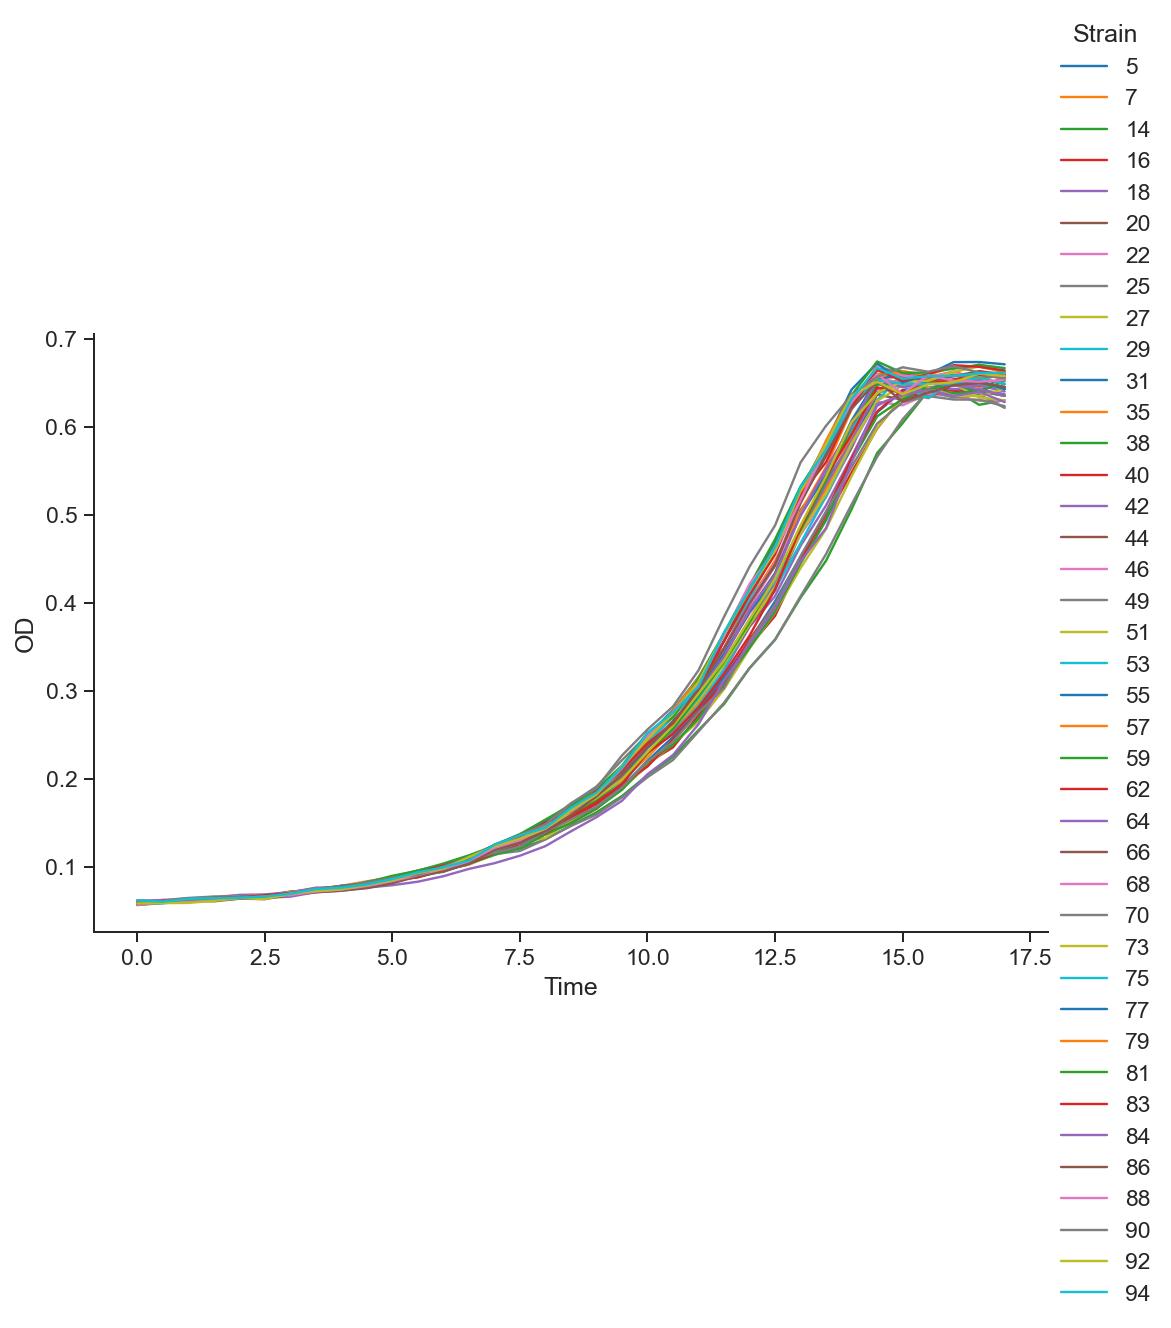

In [181]:
mat = sio.loadmat('../data/growth/YPD_39deg_RefinedB_vs_TrisomicB.mat')
plate = mat['plate_mat']
df = pd.DataFrame(data=plate).T
df.columns = list(zip(r,range(96)))
df['Time'] = list(times)
df = pd.melt(df, id_vars='Time', var_name='Strain-Index', value_name='OD')
df['type'] = df['Strain-Index'].apply(lambda x:x[0])
df['Index'] = df['Strain-Index'].apply(lambda x:x[1])
df['Strain'] = df['Strain-Index'].apply(lambda x:x[1])
dftrisomic = df[df['type']=='trisomic']
dfrefined = df[df['type']=='refined']

df = dftrisomic

# df = df[~df['Index'].isin([0,4,30,37,39,58])] #refined manual
# df = df[~df['Index'].isin([3,9,11,33])] # trisomic manual

df = df[~df['Index'].isin([ 0, 13, 24, 26, 80, 82, 89, 91])] #refined 85% on time 10
df = df[~df['Index'].isin([ 4, 30, 37, 39, 58])] #refined additiona anomalies manual
df = df[~df['Index'].isin([ 1,  3,  9, 11, 12, 33, 36, 60])] #trisomic [7.5-92.5 percentile] on time 10

# df = df[~df['Index'].isin([ 0,  2, 13, 15, 24, 26, 28, 37, 39, 45, 69, 72, 78, 80, 82, 87, 89,91, 93, 95])] #refined 20 to 80 percentile
# df = df[~df['Index'].isin([ 1,  3,  9, 11, 12, 14, 16, 25, 27, 33, 36, 40, 60, 70, 77, 81, 84,88, 90, 94])] #trisomic 20 to 80 percentile

curveball.plots.plot_strains(df)

In [183]:
dfpoint = df[(df['Time']<10) & (df['Time']>9.9) ]
# dfpoint

In [184]:
l,h = np.percentile(dfpoint['OD'],[7.5,92.5])
print(l,h)
dfpoint[(dfpoint['OD']<l) | (dfpoint['OD']>h)]

0.2131475 0.249965


,Time,Strain-Index,OD,type,Index,Strain
510,9.999444,"(trisomic, 14)",0.2040,trisomic,14,14
895,9.999444,"(trisomic, 25)",0.2017,trisomic,25,25
2855,9.999444,"(trisomic, 81)",0.2521,trisomic,81,81
2960,9.999444,"(trisomic, 84)",0.2051,trisomic,84,84
3170,9.999444,"(trisomic, 90)",0.2559,trisomic,90,90
3310,9.999444,"(trisomic, 94)",0.2520,trisomic,94,94


In [185]:
dfpoint[(dfpoint['OD']<l) | (dfpoint['OD']>h)].Index.unique()

array([14, 25, 81, 84, 90, 94])